<a href="https://colab.research.google.com/github/AdrianaGuti/Talento_Tech/blob/main/Conjunto_MNIST_Adriana_Gutierrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8557 - loss: 0.4912 - val_accuracy: 0.9638 - val_loss: 0.1169
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9716 - loss: 0.0966 - val_accuracy: 0.9720 - val_loss: 0.0959
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.9710 - val_loss: 0.0983
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.9762 - val_loss: 0.0830
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9914 - loss: 0.0272 - val_accuracy: 0.9742 - val_loss: 0.0912
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0960
Precisión en el conjunto de prueba: 0.9764000177383423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


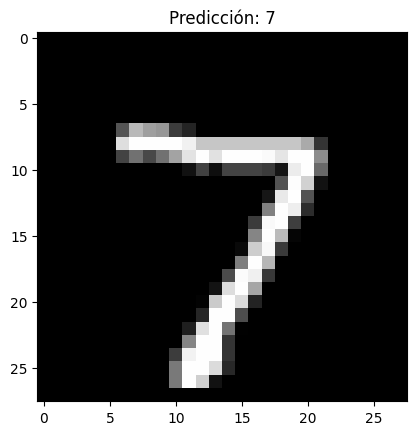

In [2]:
# Paso 1: Importar bibliotecas
import tensorflow as tf                         #entrenamiento de las neuronas
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np                              #Manejo de datos en forma de matriz
import matplotlib.pyplot as plt                 #Graficas
from PIL import Image                           #manejo de imagenes

# Paso 2: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 3: Preprocesar los datos
x_train = x_train.astype('float32') / 255  # Normalización
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes
x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Paso 4: Definir el modelo MLP
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

# Paso 5: Compilar el modelo
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Paso 6: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')
# Paso 8: Probar el modelo con una imagen del conjunto de prueba
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen)
digit_predicho = np.argmax(prediccion)
# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()
